# Curso Análisis de Redes

## Cátedra Teoría de las Telecomunicaciones - Universidad ORT Uruguay



# Teoría de Colas

In [1]:
#using Pkg;Pkg.instantiate(); Pkg.update()

## Sistemas de fila de espera

Nos interesa modelar sistemas de *eventos discretos* en los cuales:

* Hay un arribo de "trabajos" o "clientes" a cierta tasa $\lambda$ de manera estocástica.
* Los clientes son puestos en una o varias *filas de espera* (colas).
* Cada trabajo es atendido por uno o múltiples *servidores* a cierta *tasa*.
* Al terminar su servicio, el trabajo deja el sistema.

### Diagrama

![Sistema](images/sistema.png "Sistema")

### Magnitudes de interés

La primera pregunta clave es:

> **Estabilidad:** ¿El sistema llega a equilibrio o régimen bien definido?

Si es estable, podemos preguntarnos además:

> **Medidas de desempeño:**
> * ¿Cuál es la ocupación media del sistema? ($E[X(t)]$ en régimen).
>
> * ¿Cuál es la probabilidad/prop. de tiempo que los servidores se encuentran trabajando? (ej: $P(X(t)>0)$)
>
> * ¿Cuál es el retardo medio sufrido por un cliente? ($E[W]$)
>
> * Para los sistemas con límite de capacidad: ¿cuál es la probabilidad de *bloqueo*?

### Teoría de colas: dos caminos.


**Teoría de colas Markoviana:**

* Si los arribos son Poisson y los tiempos de servicio exponenciales, en general es posible realizar un modelo de Cadena de Markov de Tiempo Continuo para el sistema.

* En este caso, la mayoría de las medidas de desempeño se calculan a partir del régimen de la cadena (cuando es estable).

* Mediante la propiedad PASTA, muchos resultados se trasladan a medidas de desempeño sobre los trabajos (retardo, bloqueo, etc.)

**Teoría de colas general:**

* Aquí no hay una herramienta unificada. Hay pocos resultados generales. Uno en particular es la **ley de Little**.

* Estudiaremos además el caso en que los servicios son de distribución genérica.

## Teoría de colas Markoviana

Comencemos por el sistema más simple posible de cola-servidor, denominado cola $M/M/1$:

> **Cola M/M/1:**
>
> * Llegan trabajos al sistema como un proceso de Poisson de tasa $\lambda$ (sin memoria, por eso la $M$).
>
> * Los trabajos tienen una duración exponencial de parámetro $\mu$ (sin memoria, por eso la segunda $M$).
>
> * Los trabajos son atendidos por un único servidor (de ahí el $1$). Mientras este atiende un trabajo, los restantes son puestos en cola y atendidos por ejemplo en orden de llegada.
>
> * El sistema no tiene límite de capacidad.

### Cola $M/M/1$ - diagrama:

![Cola M/M/1](images/mm1.png "Cola M/M/1")

Definamos:

$$X(t) = \text{no. de clientes en el sistema en tiempo } t.$$

Notemos que $X$ incluye al trabajo en servicio. En particular, el servidor está trabajando si y solo si $X>0$.

### Modelo Markoviano de la cola $M/M/1$:

Observemos que:

* $X(t)$ toma valores en $E=\{0,1,2,\ldots\}$.
* Si $X=0$, entonces el sistema espera un tiempo exponencial de parámetro $\lambda$ a que llegue el primer cliente.
* Si $X=1,2,\ldots$, entonces la transición es la primera de dos posibilidades:
   * Al cabo de una $\exp(\lambda)$, llegará un nuevo cliente $X\to X+1$.
   * Al cabo de una $\exp(\mu)$, el cliente en servicio deja el sistema $X\to X-1$.
   
* Por la pérdida de memoria de la exponencial, luego de la transición podemos pensar que los tiempos anteriores "comienzan nuevamente".

El razonamiento anterior sugiere el siguiente modelo de cadena para $X(t)$:

![Cadena M/M/1](images/birth_death.png "Cadena de la cola M/M/1")

### Cálculo del estado estacionario.

Dado el modelo, es fácil ver que si $\lambda.\mu>0$ es irreducible. Podemos intentaar calcular $\pi$, la distribución estacionaria del sistema. Para ello, podemos usar las ecuaciones de balance global, o bien, por un truco similar al visto para el paseo al azar con barrera, plantear únicamente *balance local*:

Las ecuaciones son:

$$\begin{align} \pi_0 \lambda &= \pi_1\mu \\ \pi_1 \lambda &= \pi_2\mu \\ \pi_2 \lambda &= \pi_3\mu \\ \cdots& \end{align}$$

De donde, definiendo el parámetro de *carga* $\rho=\lambda/\mu$:

$$\pi_k = \pi_{k-1} \rho = \pi_{k-2}\rho^2 = \cdots = \pi_0 \rho^k.$$

Es decir, la distribución tiene forma geométrica (comenzando en $k=0$).

### Condición de estabilidad

Imponiendo que $\sum_k \pi_k =1$ obtenemos:

$$1 = \sum_{k=0}^\infty \pi_0 \rho^k = \pi_0 \sum_{k=0}^\infty \rho^k.$$

Por lo tanto:

* Si $\rho < 1$, el sistema es *ergódico* ya que es irreducible y tiene solución única a las ecuaciones de balance. En ese caso:

$$1 = \pi_0 \sum_{k=0}^\infty \rho^k = \pi_0 \frac{1}{1-\rho} \Rightarrow \pi_0 = (1-\rho).$$

Y la distribución de equilibrio de $X$ es:

$$\pi_k = (1-\rho)\rho^k, \quad k=0,1,2,\ldots$$

* Si $\rho\geqslant 1$, el sistema *no es ergódico* (de hecho es transitorio si $\rho>1$. En dicho caso la cola acumula clientes permanentemente.

### Simulación

In [7]:
using Distributions

function simula_MM1(lambda,mu,x0,Tfinal)
    
    d1 = Exponential(1/lambda)
    d2 = Exponential(1/mu)
    
    x=x0
    t=0.0
    
    T=[t]
    X=[x]
    
    while t<Tfinal
        
        if x>0
            t1 = rand(d1)  #tiempo para subir
            t2 = rand(d2)  ##tiempo para bajar
        
            if t1<t2    #gana subir
                x=x+1
                t=t+t1
            else        #gana bajar
                x=x-1
                t=t+t2
            end

        else    
            t=t+rand(d1) #en 0 solo subo
            x=x+1
        end
        
        push!(T,t)
        push!(X,x)
        
        
    end

    return T,X
end

simula_MM1 (generic function with 1 method)

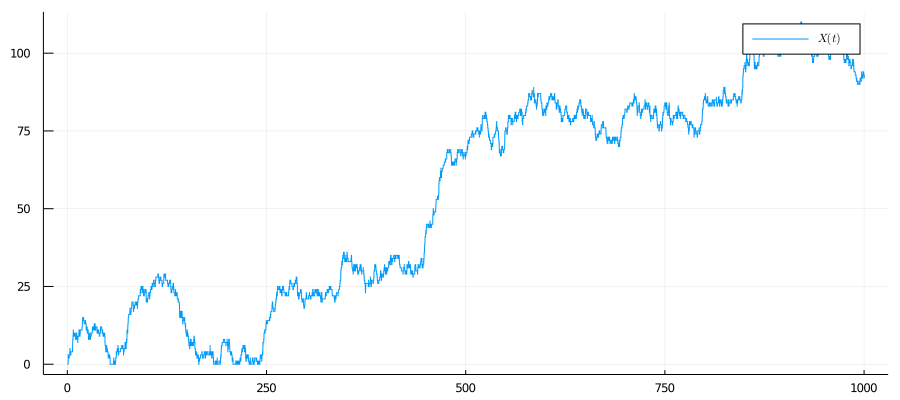

In [10]:
using Plots, LaTeXStrings
default(size=(900,400))

#Caso inestable
lambda = 1.1
mu = 1.0
Tfinal = 1000

T,X = simula_MM1(lambda,mu,0,Tfinal)

plot(T,X,lt=:steppost,label=L"X(t)")

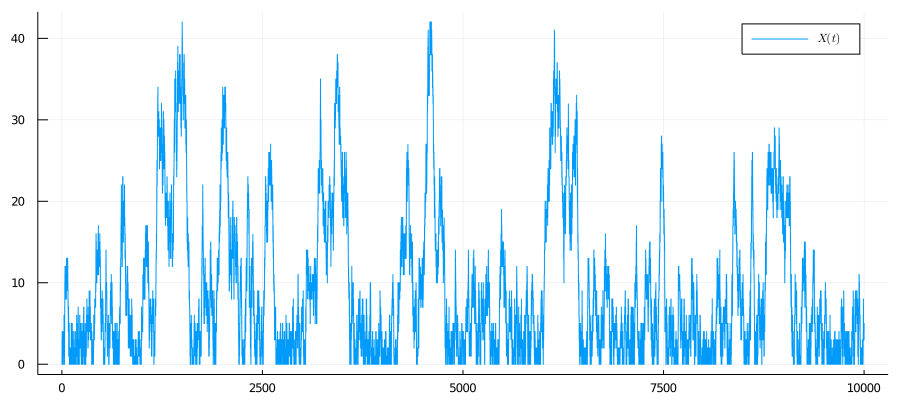

In [20]:
#Caso estable
lambda = 0.9
mu = 1.0
Tfinal = 10000

T,X = simula_MM1(lambda,mu,0,Tfinal)

plot(T,X,lt=:steppost,label=L"X(t)")

### Ocupación Media del Sistema

Calculemos $\bar{X} = E[X(t)]$ en régimen.

$$\begin{align}
E[X(t)] &= \sum_{k=0}^\infty k (1-\rho)\rho^k = (1-\rho)\rho\sum_{k=1}^\infty k \rho^{k-1} \\
&= (1-\rho)\rho\sum_{k=1}^\infty \frac{d}{d\rho} \rho^k = (1-\rho)\rho \frac{d}{d\rho} \left(\frac{1}{1-\rho}\right) \\
&= (1-\rho)\rho \frac{1}{(1-\rho)^2} \\
&= \frac{\rho}{1-\rho}.
\end{align}$$


In [25]:
rho = lambda/mu
Xbar_teo = rho/(1-rho)
Xbar = sum(X[1:end-1].*diff(T))/T[end]

println("X medio teórico: $Xbar, X medio empirico: $Xbar_teo")

X medio teórico: 8.919061956733664, X medio empirico: 9.000000000000002


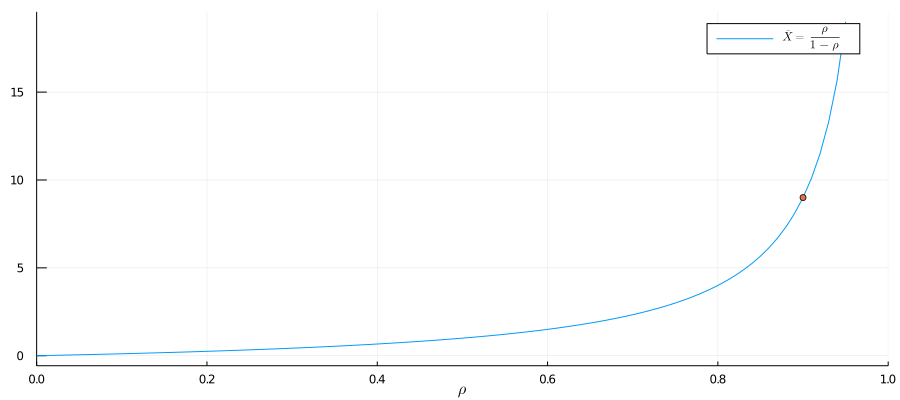

In [35]:
r=(0:.01:.95)

plot(r,r./(1 .-r), label=L"\bar{X} = \frac{\rho}{1-\rho}", xlabel=L"\rho", xlim=(0,1))
scatter!([rho],[rho/(1-rho)],marker=:circle, label=:none)

### Probabilidad de que el sistema esté trabajando

El sistema está trabajando si y solo si $X(t)>0$, por lo que la utilización $U$ es:

$$U = P(X(t)>0) = 1-\pi_0 = \rho.$$

In [24]:
utilizacion = sum( (X[1:end-1].>0).*diff(T))/T[end]
println("Utilización: $utilizacion")

Utilización: 0.8909366180783365


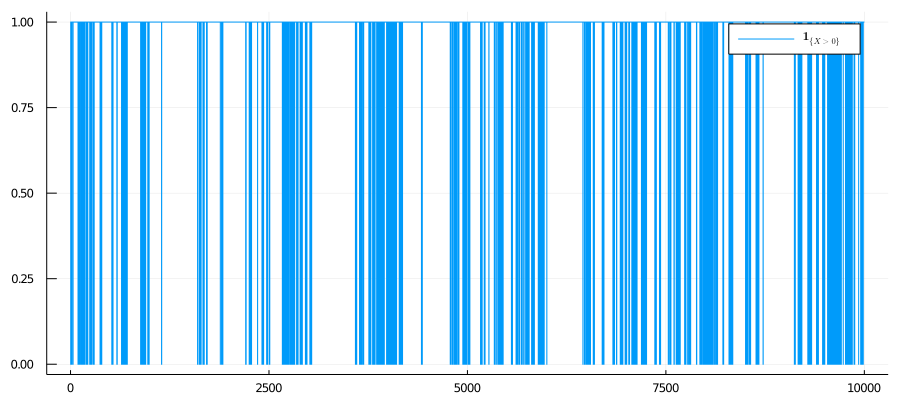

In [37]:
plot(T,X.>0, lt=:steppost, label=L"\mathbf{1}_{\{X>0\}}")

### Retardo de un cliente

Queremos analizar $\bar{W} = E[W]$, el retardo medio de punta a punta sufrido por un cliente. Notar que esta es una magnitud observada *por los clientes y no por el sistema*.

**Idea:** Por la propiedad PASTA, un arribo típico encuentra al sistema como si estuviera en régimen.

Por lo tanto, al llegar el cliente $n$ encuentra:

  * $k$ clientes adelante con probabilidad $\pi_k = (1-\rho)\rho^k$.
  * Cada uno de esos clientes requiere un retardo $1/\mu$ en media en completar su servicio.
  * A su vez, el cliente que llega requiere un retardo $1/\mu$ para su propio servicio.
  
Uniendo este razonamiento llegamos a que:

$$\begin{align}
\bar{W} &= \frac{1}{\mu} + \sum_{k=0}^\infty (1-\rho)\rho^k k \frac{1}{\mu} = \frac{1}{\mu} (1+\bar{X}) \\
&= \frac{1}{\mu} \frac{1}{1-\rho} = \frac{1}{\mu - \lambda}.
\end{align}$$

In [84]:
function simula_MM1(lambda,mu,x0,Tfinal)
    
    d1 = Exponential(1/lambda)
    d2 = Exponential(1/mu)
    
    x=x0
    t=0.0
    
    T=[t]
    X=[x]

    arribos = Int64[]
    salidas = Int64[]
    
    i=1
    while t<Tfinal
        
        i=i+1
        if x>0
            t1 = rand(d1)  #tiempo para subir
            t2 = rand(d2)  ##tiempo para bajar
        
            if t1<t2    #gana subir
                x=x+1
                t=t+t1
                push!(arribos,i)
            else        #gana bajar
                x=x-1
                t=t+t2
                push!(salidas,i)
            end

        else    
            t=t+rand(d1) #en 0 solo subo
            x=x+1
            push!(arribos,i)
        end
        
        push!(T,t)
        push!(X,x)
        
        
    end

    return T,X, arribos, salidas
end

simula_MM1 (generic function with 1 method)

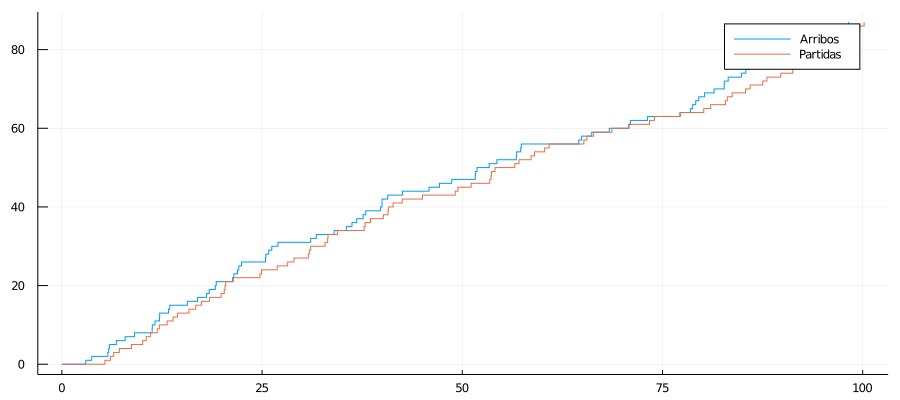

In [130]:
#Caso estable
lambda = 0.9
mu = 1.0
Tfinal = 100

T,X, arribos, salidas = simula_MM1(lambda,mu,0,Tfinal)

Na = length(arribos)
Ns = length(salidas)

Tarribos = T[arribos]
Tsalidas = T[salidas]

plot([0;Tarribos], (0:Na), lt=:steppost, label="Arribos")
plot!([0;Tsalidas], (0:Ns), lt=:steppost, label="Partidas")

In [131]:
W=Tsalidas - Tarribos[1:Ns]

87-element Array{Float64,1}:
 2.386605510698064
 2.32499810878901
 0.7206010514045493
 1.327542178739641
 2.746582907618855
 3.292341026832008
 2.638856612956449
 1.985907269625212
 0.6454616715756902
 0.8833883559291547
 1.5123808305372979
 1.6921560821971138
 2.2345989411034797
 ⋮
 5.486621549336576
 3.11782877058549
 2.1292785049048746
 2.563043943376641
 0.9144611928775674
 0.7995418331725688
 0.921816745115521
 1.7623639326235008
 2.0042735774200224
 3.2737177687346986
 4.753195096800965
 1.9442304268350767

In [132]:
mean(W)

2.5744881217451767

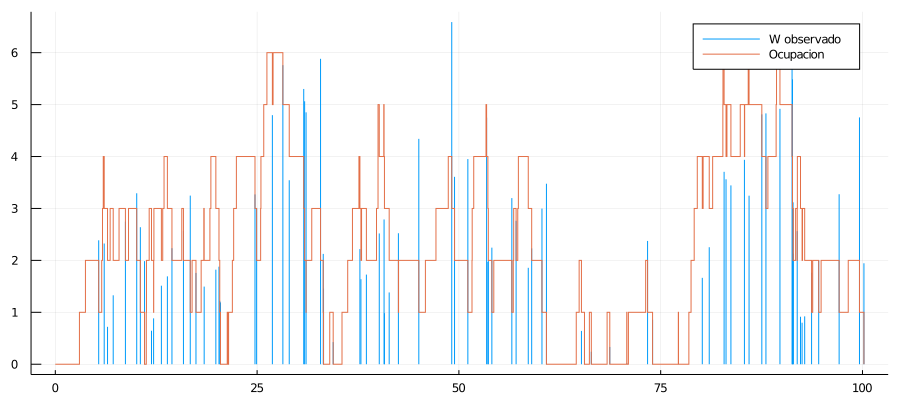

In [133]:
plot(Tsalidas,W, lt=:stem, label="W observado")
plot!(T,X ,lt=:steppost, label="Ocupacion")

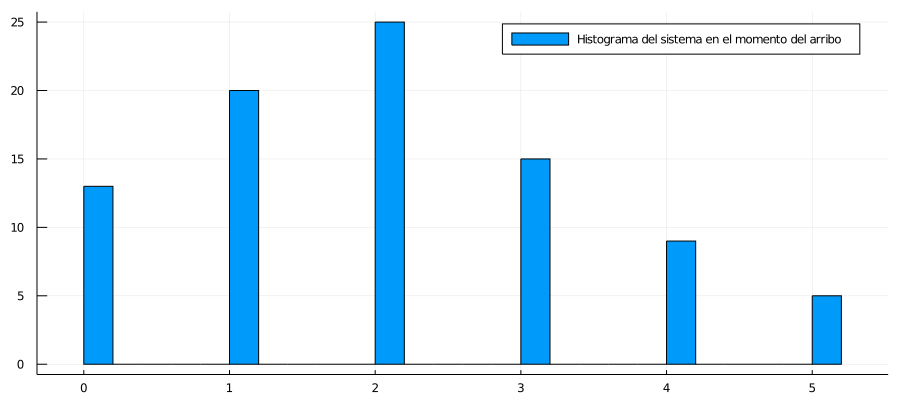

In [134]:
using StatsBase

Xa = X[arribos].-1
hist = fit(Histogram,Xa,nbins=30)

plot(hist, label="Histograma del sistema en el momento del arribo")

### Observación (ley de Little en el caso $M/M/1$)

Notemos que:

$$\bar{X} = \frac{\rho}{1-\rho} = \frac{\lambda}{\mu - \lambda} = \lambda \bar{W}.$$

Este es un caso particular de un resultado mucho más general conocido como **ley de Little**:

$$\bar{X} = \bar{\lambda} \bar{W}.$$

Siendo $\bar{X}$ la ocupación media del sistema, $\bar{W}$ el retardo medio de atravesarlo y $\bar{\lambda}$ la tasa media de arribos (en este caso era constante). Esta relación de proporcionalidad vale en contextos más generales.

<img src="images/kleinrock.jpg" style="height: 300px;float:right;padding-left:2em"/>

## Pregunta: multiplexado de capacidad.

Supongamos que tenemos un sistema al que llegan clientes con tasa $N\lambda$. Cada cliente tiene un trabajo de tiempo exponencial de parámetro $\mu$. Compare las siguientes situaciones:

 * Los clientes al llegar son enviados a una de $N$ colas al azar, donde cada una es atendida por un servidor de velocidad $1$.
 
 * Los clientes son todos puestos en una única cola de velocidad $N$.
 
¿Cuál sistema le parece mejor? ¿Qué puede decir sobre el retardo medio en uno y otro sistema?

**Nota:** la respuesta a esta pregunta es la base de las redes "de datagramas" como Internet (Kleinrock, 1969).